# 第四週範例程式 -- 使用 nltk 處理英文

新聞來源：https://edition.cnn.com/2023/03/05/asia/ukraine-war-us-pacific-alliances-intl-hnk/index.html

In [ ]:
Title_CNN = 'Ukraine war has made it easier for US to isolate China in the Pacific'
Content_CNN = '''A year after Russia invaded Ukraine, Xi Jinping’s backing of Vladimir Putin has opened the door for the United States and partners in the Pacific to shore up sometimes frayed relationships to the detriment of Beijing.

In the past few months alone, Japan has pledged to double defense spending and acquire long-range weapons from the US; South Korea has acknowledged that stability in the Taiwan Strait is essential to its security; the Philippines has announced new US base access rights and is talking about joint patrols of the South China Sea with Australia, Japan and the United States.

Those might be the biggest initiatives, but they are far from the only events that have left China increasingly isolated in its own backyard as it refuses to condemn the invasion of a sovereign country by its partner in Moscow while keeping military pressure on the self-ruled island of Taiwan.

Analysts say all these things would have likely happened without the war in Ukraine, but the war, and China’s backing of Russia, has helped grease the skids to get these projects done.

Take the situation of Japan, a country limited in its post-World War II constitution to “self-defense” forces. Now it’s going to buy long-range Tomahawk cruise missiles from the US, weapons that could strike well inside China.

“I myself have a strong sense of urgency that Ukraine today may be East Asia tomorrow,” Japanese Prime Minister Fumio Kishida told a major defense conference in Singapore last summer.

In December, Kishida followed that up with a plan to double Tokyo’s defense spending while acquiring weapons with ranges well outside Japanese territory.
'''


In [ ]:
# 必須先下載模型、語料
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

基本單位：字

In [ ]:
from nltk.tokenize import word_tokenize

word_result = word_tokenize(Content_CNN)

# check result
print(word_result)

['A', 'year', 'after', 'Russia', 'invaded', 'Ukraine', ',', 'Xi', 'Jinping', '’', 's', 'backing', 'of', 'Vladimir', 'Putin', 'has', 'opened', 'the', 'door', 'for', 'the', 'United', 'States', 'and', 'partners', 'in', 'the', 'Pacific', 'to', 'shore', 'up', 'sometimes', 'frayed', 'relationships', 'to', 'the', 'detriment', 'of', 'Beijing', '.', 'In', 'the', 'past', 'few', 'months', 'alone', ',', 'Japan', 'has', 'pledged', 'to', 'double', 'defense', 'spending', 'and', 'acquire', 'long-range', 'weapons', 'from', 'the', 'US', ';', 'South', 'Korea', 'has', 'acknowledged', 'that', 'stability', 'in', 'the', 'Taiwan', 'Strait', 'is', 'essential', 'to', 'its', 'security', ';', 'the', 'Philippines', 'has', 'announced', 'new', 'US', 'base', 'access', 'rights', 'and', 'is', 'talking', 'about', 'joint', 'patrols', 'of', 'the', 'South', 'China', 'Sea', 'with', 'Australia', ',', 'Japan', 'and', 'the', 'United', 'States', '.', 'Those', 'might', 'be', 'the', 'biggest', 'initiatives', ',', 'but', 'they', '

In [ ]:
freq_word = nltk.FreqDist(word_result)

topk = 20
print(f'排名前 {topk} 名的字頻：', freq_word.most_common(topk))


排名前 20 名的字頻： [('the', 19), (',', 11), ('to', 9), ('of', 8), ('.', 8), ('in', 7), ('has', 5), ('and', 5), ('that', 5), ('a', 5), ('’', 4), ('s', 4), ('its', 4), ('China', 4), ('Ukraine', 3), ('Japan', 3), ('defense', 3), ('weapons', 3), ('from', 3), ('US', 3)]


In [ ]:
# 導入停止詞
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english'))

notation = ',', '.', '’'
for ex in notation:
    stop_words.add(ex)

# 過濾停止詞
filtered_words = [word for word in word_result if word not in stop_words]

# 重新再做一次排名
freq_word = nltk.FreqDist(filtered_words)

topk = 20
print(f'排名前 {topk} 名的字頻：', freq_word.most_common(topk))

排名前 20 名的字頻： [('China', 4), ('Ukraine', 3), ('Japan', 3), ('defense', 3), ('weapons', 3), ('US', 3), ('Russia', 2), ('backing', 2), ('United', 2), ('States', 2), ('In', 2), ('double', 2), ('spending', 2), ('long-range', 2), (';', 2), ('South', 2), ('Taiwan', 2), ('country', 2), ('war', 2), ('“', 2)]


基本單位：兩個字

In [ ]:
bigrm_result = nltk.bigrams(word_result)
for bi in bigrm_result:
    print(bi)

('A', 'year')
('year', 'after')
('after', 'Russia')
('Russia', 'invaded')
('invaded', 'Ukraine')
('Ukraine', ',')
(',', 'Xi')
('Xi', 'Jinping')
('Jinping', '’')
('’', 's')
('s', 'backing')
('backing', 'of')
('of', 'Vladimir')
('Vladimir', 'Putin')
('Putin', 'has')
('has', 'opened')
('opened', 'the')
('the', 'door')
('door', 'for')
('for', 'the')
('the', 'United')
('United', 'States')
('States', 'and')
('and', 'partners')
('partners', 'in')
('in', 'the')
('the', 'Pacific')
('Pacific', 'to')
('to', 'shore')
('shore', 'up')
('up', 'sometimes')
('sometimes', 'frayed')
('frayed', 'relationships')
('relationships', 'to')
('to', 'the')
('the', 'detriment')
('detriment', 'of')
('of', 'Beijing')
('Beijing', '.')
('.', 'In')
('In', 'the')
('the', 'past')
('past', 'few')
('few', 'months')
('months', 'alone')
('alone', ',')
(',', 'Japan')
('Japan', 'has')
('has', 'pledged')
('pledged', 'to')
('to', 'double')
('double', 'defense')
('defense', 'spending')
('spending', 'and')
('and', 'acquire')
('acq

In [ ]:
# 那三個字？
trigrm_result = nltk.trigrams(word_result)
for tri in trigrm_result:
    print(tri)

('A', 'year', 'after')
('year', 'after', 'Russia')
('after', 'Russia', 'invaded')
('Russia', 'invaded', 'Ukraine')
('invaded', 'Ukraine', ',')
('Ukraine', ',', 'Xi')
(',', 'Xi', 'Jinping')
('Xi', 'Jinping', '’')
('Jinping', '’', 's')
('’', 's', 'backing')
('s', 'backing', 'of')
('backing', 'of', 'Vladimir')
('of', 'Vladimir', 'Putin')
('Vladimir', 'Putin', 'has')
('Putin', 'has', 'opened')
('has', 'opened', 'the')
('opened', 'the', 'door')
('the', 'door', 'for')
('door', 'for', 'the')
('for', 'the', 'United')
('the', 'United', 'States')
('United', 'States', 'and')
('States', 'and', 'partners')
('and', 'partners', 'in')
('partners', 'in', 'the')
('in', 'the', 'Pacific')
('the', 'Pacific', 'to')
('Pacific', 'to', 'shore')
('to', 'shore', 'up')
('shore', 'up', 'sometimes')
('up', 'sometimes', 'frayed')
('sometimes', 'frayed', 'relationships')
('frayed', 'relationships', 'to')
('relationships', 'to', 'the')
('to', 'the', 'detriment')
('the', 'detriment', 'of')
('detriment', 'of', 'Beijing'

In [ ]:
# 那四個字？
fourgrm_result = nltk.ngrams(word_result, 4)
for fourG in fourgrm_result:
    print(fourG)

# 五以上，同理可證！

('A', 'year', 'after', 'Russia')
('year', 'after', 'Russia', 'invaded')
('after', 'Russia', 'invaded', 'Ukraine')
('Russia', 'invaded', 'Ukraine', ',')
('invaded', 'Ukraine', ',', 'Xi')
('Ukraine', ',', 'Xi', 'Jinping')
(',', 'Xi', 'Jinping', '’')
('Xi', 'Jinping', '’', 's')
('Jinping', '’', 's', 'backing')
('’', 's', 'backing', 'of')
('s', 'backing', 'of', 'Vladimir')
('backing', 'of', 'Vladimir', 'Putin')
('of', 'Vladimir', 'Putin', 'has')
('Vladimir', 'Putin', 'has', 'opened')
('Putin', 'has', 'opened', 'the')
('has', 'opened', 'the', 'door')
('opened', 'the', 'door', 'for')
('the', 'door', 'for', 'the')
('door', 'for', 'the', 'United')
('for', 'the', 'United', 'States')
('the', 'United', 'States', 'and')
('United', 'States', 'and', 'partners')
('States', 'and', 'partners', 'in')
('and', 'partners', 'in', 'the')
('partners', 'in', 'the', 'Pacific')
('in', 'the', 'Pacific', 'to')
('the', 'Pacific', 'to', 'shore')
('Pacific', 'to', 'shore', 'up')
('to', 'shore', 'up', 'sometimes')
('s

## 延伸應用：文字雲

使用套件：WordCloud


## Quiz - 1 : 請將 CNN 新聞所製作的文字雲，上傳至本週小練習。

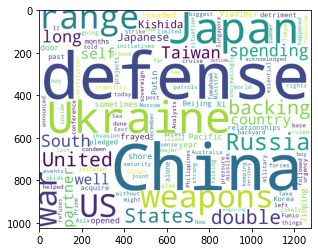

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

width=1280
height=1024
bg='white'
angle=0.9

text = ' '.join(filtered_words)
cloud = WordCloud(background_color = bg, width=width, height=height).generate(text)
plt.imshow(cloud)

# Quiz -1 : 請將 CNN 新聞所製作的文字雲，上傳至本週小練習。
# 使用 WordCloud.to_file() 可存成檔案


---

以下是處理中文區塊

In [ ]:
Title_LibTime = '台漁船翻覆7人下落不明 日媒：船艙內尋獲1具遺體'
Content_LibTime = '''〔即時新聞／綜合報導〕我國籍漁船「新長發88號」在黃尾嶼附近海域翻覆，船上7人下落不明，此處海域位於日本沖繩縣石垣島北方，海巡署與日本海上保安廳均緊急派船搜救。根據日媒《琉球放送》（RBC）報導指出，石垣海上保安本部稍早在船內尋獲1具遺體，其他6人仍下落不明。

根據日媒《琉球放送》（RBC）報導，台灣漁船「新長發88號」內共有7人，包括1名台籍船長及6名印尼籍漁工。石垣海上保安本部於當地5日下午約1時30分接獲自衛隊通報船隻翻覆消息，在石垣島以北150攻里處海域發現翻覆漁船，船隻翻覆後僅剩船頭浮在海面上。

在派船前往現場搜索後，在6日上午9點15分左右，在船內尋獲1具遺體，剩下6人仍下落不明，石垣海上保安本部派遣2艘巡視船、1架直升機在事發周邊海域持續搜索剩下6名失蹤船員。
'''

In [ ]:
# 必須先下載模型、語料
import nltk
nltk.download('punkt')
nltk.download('all-corpora')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloadi

True

In [ ]:
bigrm_result = nltk.bigrams(Content_LibTime)
for bi in bigrm_result:
    print(bi)

('〔', '即')
('即', '時')
('時', '新')
('新', '聞')
('聞', '／')
('／', '綜')
('綜', '合')
('合', '報')
('報', '導')
('導', '〕')
('〕', '我')
('我', '國')
('國', '籍')
('籍', '漁')
('漁', '船')
('船', '「')
('「', '新')
('新', '長')
('長', '發')
('發', '8')
('8', '8')
('8', '號')
('號', '」')
('」', '在')
('在', '黃')
('黃', '尾')
('尾', '嶼')
('嶼', '附')
('附', '近')
('近', '海')
('海', '域')
('域', '翻')
('翻', '覆')
('覆', '，')
('，', '船')
('船', '上')
('上', '7')
('7', '人')
('人', '下')
('下', '落')
('落', '不')
('不', '明')
('明', '，')
('，', '此')
('此', '處')
('處', '海')
('海', '域')
('域', '位')
('位', '於')
('於', '日')
('日', '本')
('本', '沖')
('沖', '繩')
('繩', '縣')
('縣', '石')
('石', '垣')
('垣', '島')
('島', '北')
('北', '方')
('方', '，')
('，', '海')
('海', '巡')
('巡', '署')
('署', '與')
('與', '日')
('日', '本')
('本', '海')
('海', '上')
('上', '保')
('保', '安')
('安', '廳')
('廳', '均')
('均', '緊')
('緊', '急')
('急', '派')
('派', '船')
('船', '搜')
('搜', '救')
('救', '。')
('。', '根')
('根', '據')
('據', '日')
('日', '媒')
('媒', '《')
('《', '琉')
('琉', '球')
('球', '放')
('放', '送')
('送', '》')
('》', '（')
('（', 'R')

In [ ]:
# 那三個字？
trigrm_result = nltk.trigrams(Content_LibTime)
for tri in trigrm_result:
    print(tri)

('〔', '即', '時')
('即', '時', '新')
('時', '新', '聞')
('新', '聞', '／')
('聞', '／', '綜')
('／', '綜', '合')
('綜', '合', '報')
('合', '報', '導')
('報', '導', '〕')
('導', '〕', '我')
('〕', '我', '國')
('我', '國', '籍')
('國', '籍', '漁')
('籍', '漁', '船')
('漁', '船', '「')
('船', '「', '新')
('「', '新', '長')
('新', '長', '發')
('長', '發', '8')
('發', '8', '8')
('8', '8', '號')
('8', '號', '」')
('號', '」', '在')
('」', '在', '黃')
('在', '黃', '尾')
('黃', '尾', '嶼')
('尾', '嶼', '附')
('嶼', '附', '近')
('附', '近', '海')
('近', '海', '域')
('海', '域', '翻')
('域', '翻', '覆')
('翻', '覆', '，')
('覆', '，', '船')
('，', '船', '上')
('船', '上', '7')
('上', '7', '人')
('7', '人', '下')
('人', '下', '落')
('下', '落', '不')
('落', '不', '明')
('不', '明', '，')
('明', '，', '此')
('，', '此', '處')
('此', '處', '海')
('處', '海', '域')
('海', '域', '位')
('域', '位', '於')
('位', '於', '日')
('於', '日', '本')
('日', '本', '沖')
('本', '沖', '繩')
('沖', '繩', '縣')
('繩', '縣', '石')
('縣', '石', '垣')
('石', '垣', '島')
('垣', '島', '北')
('島', '北', '方')
('北', '方', '，')
('方', '，', '海')
('，', '海', '巡')
('海', '巡', '署')
('巡', '署

In [ ]:
# 那四個字？
fourgrm_result = nltk.ngrams(Content_LibTime, 4)
for fourG in fourgrm_result:
    print(fourG)

('〔', '即', '時', '新')
('即', '時', '新', '聞')
('時', '新', '聞', '／')
('新', '聞', '／', '綜')
('聞', '／', '綜', '合')
('／', '綜', '合', '報')
('綜', '合', '報', '導')
('合', '報', '導', '〕')
('報', '導', '〕', '我')
('導', '〕', '我', '國')
('〕', '我', '國', '籍')
('我', '國', '籍', '漁')
('國', '籍', '漁', '船')
('籍', '漁', '船', '「')
('漁', '船', '「', '新')
('船', '「', '新', '長')
('「', '新', '長', '發')
('新', '長', '發', '8')
('長', '發', '8', '8')
('發', '8', '8', '號')
('8', '8', '號', '」')
('8', '號', '」', '在')
('號', '」', '在', '黃')
('」', '在', '黃', '尾')
('在', '黃', '尾', '嶼')
('黃', '尾', '嶼', '附')
('尾', '嶼', '附', '近')
('嶼', '附', '近', '海')
('附', '近', '海', '域')
('近', '海', '域', '翻')
('海', '域', '翻', '覆')
('域', '翻', '覆', '，')
('翻', '覆', '，', '船')
('覆', '，', '船', '上')
('，', '船', '上', '7')
('船', '上', '7', '人')
('上', '7', '人', '下')
('7', '人', '下', '落')
('人', '下', '落', '不')
('下', '落', '不', '明')
('落', '不', '明', '，')
('不', '明', '，', '此')
('明', '，', '此', '處')
('，', '此', '處', '海')
('此', '處', '海', '域')
('處', '海', '域', '位')
('海', '域', '位', '於')
('域', '位', '於

英文字可不可以也直接取用內容做 bigram？

In [ ]:
bigrm_result = nltk.bigrams(Content_CNN)
for bi in bigrm_result:
    print(bi)

('A', ' ')
(' ', 'y')
('y', 'e')
('e', 'a')
('a', 'r')
('r', ' ')
(' ', 'a')
('a', 'f')
('f', 't')
('t', 'e')
('e', 'r')
('r', ' ')
(' ', 'R')
('R', 'u')
('u', 's')
('s', 's')
('s', 'i')
('i', 'a')
('a', ' ')
(' ', 'i')
('i', 'n')
('n', 'v')
('v', 'a')
('a', 'd')
('d', 'e')
('e', 'd')
('d', ' ')
(' ', 'U')
('U', 'k')
('k', 'r')
('r', 'a')
('a', 'i')
('i', 'n')
('n', 'e')
('e', ',')
(',', ' ')
(' ', 'X')
('X', 'i')
('i', ' ')
(' ', 'J')
('J', 'i')
('i', 'n')
('n', 'p')
('p', 'i')
('i', 'n')
('n', 'g')
('g', '’')
('’', 's')
('s', ' ')
(' ', 'b')
('b', 'a')
('a', 'c')
('c', 'k')
('k', 'i')
('i', 'n')
('n', 'g')
('g', ' ')
(' ', 'o')
('o', 'f')
('f', ' ')
(' ', 'V')
('V', 'l')
('l', 'a')
('a', 'd')
('d', 'i')
('i', 'm')
('m', 'i')
('i', 'r')
('r', ' ')
(' ', 'P')
('P', 'u')
('u', 't')
('t', 'i')
('i', 'n')
('n', ' ')
(' ', 'h')
('h', 'a')
('a', 's')
('s', ' ')
(' ', 'o')
('o', 'p')
('p', 'e')
('e', 'n')
('n', 'e')
('e', 'd')
('d', ' ')
(' ', 't')
('t', 'h')
('h', 'e')
('e', ' ')
(' ', 'd')

In [ ]:
# 那三個字？
trigrm_result = nltk.trigrams(Content_CNN)
for tri in trigrm_result:
    print(tri)

('A', ' ', 'y')
(' ', 'y', 'e')
('y', 'e', 'a')
('e', 'a', 'r')
('a', 'r', ' ')
('r', ' ', 'a')
(' ', 'a', 'f')
('a', 'f', 't')
('f', 't', 'e')
('t', 'e', 'r')
('e', 'r', ' ')
('r', ' ', 'R')
(' ', 'R', 'u')
('R', 'u', 's')
('u', 's', 's')
('s', 's', 'i')
('s', 'i', 'a')
('i', 'a', ' ')
('a', ' ', 'i')
(' ', 'i', 'n')
('i', 'n', 'v')
('n', 'v', 'a')
('v', 'a', 'd')
('a', 'd', 'e')
('d', 'e', 'd')
('e', 'd', ' ')
('d', ' ', 'U')
(' ', 'U', 'k')
('U', 'k', 'r')
('k', 'r', 'a')
('r', 'a', 'i')
('a', 'i', 'n')
('i', 'n', 'e')
('n', 'e', ',')
('e', ',', ' ')
(',', ' ', 'X')
(' ', 'X', 'i')
('X', 'i', ' ')
('i', ' ', 'J')
(' ', 'J', 'i')
('J', 'i', 'n')
('i', 'n', 'p')
('n', 'p', 'i')
('p', 'i', 'n')
('i', 'n', 'g')
('n', 'g', '’')
('g', '’', 's')
('’', 's', ' ')
('s', ' ', 'b')
(' ', 'b', 'a')
('b', 'a', 'c')
('a', 'c', 'k')
('c', 'k', 'i')
('k', 'i', 'n')
('i', 'n', 'g')
('n', 'g', ' ')
('g', ' ', 'o')
(' ', 'o', 'f')
('o', 'f', ' ')
('f', ' ', 'V')
(' ', 'V', 'l')
('V', 'l', 'a')
('l', 'a

In [ ]:
# 那四個字？
fourgrm_result = nltk.ngrams(Content_CNN, 4)
for fourG in fourgrm_result:
    print(fourG)

('A', ' ', 'y', 'e')
(' ', 'y', 'e', 'a')
('y', 'e', 'a', 'r')
('e', 'a', 'r', ' ')
('a', 'r', ' ', 'a')
('r', ' ', 'a', 'f')
(' ', 'a', 'f', 't')
('a', 'f', 't', 'e')
('f', 't', 'e', 'r')
('t', 'e', 'r', ' ')
('e', 'r', ' ', 'R')
('r', ' ', 'R', 'u')
(' ', 'R', 'u', 's')
('R', 'u', 's', 's')
('u', 's', 's', 'i')
('s', 's', 'i', 'a')
('s', 'i', 'a', ' ')
('i', 'a', ' ', 'i')
('a', ' ', 'i', 'n')
(' ', 'i', 'n', 'v')
('i', 'n', 'v', 'a')
('n', 'v', 'a', 'd')
('v', 'a', 'd', 'e')
('a', 'd', 'e', 'd')
('d', 'e', 'd', ' ')
('e', 'd', ' ', 'U')
('d', ' ', 'U', 'k')
(' ', 'U', 'k', 'r')
('U', 'k', 'r', 'a')
('k', 'r', 'a', 'i')
('r', 'a', 'i', 'n')
('a', 'i', 'n', 'e')
('i', 'n', 'e', ',')
('n', 'e', ',', ' ')
('e', ',', ' ', 'X')
(',', ' ', 'X', 'i')
(' ', 'X', 'i', ' ')
('X', 'i', ' ', 'J')
('i', ' ', 'J', 'i')
(' ', 'J', 'i', 'n')
('J', 'i', 'n', 'p')
('i', 'n', 'p', 'i')
('n', 'p', 'i', 'n')
('p', 'i', 'n', 'g')
('i', 'n', 'g', '’')
('n', 'g', '’', 's')
('g', '’', 's', ' ')
('’', 's', ' 